In [2]:
# sklearn.datasets : 데이터 세트
# sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치로 최적 파라미터 추출 등의 API 제공
# sklearn.preprocessing : 전처리에 필요한 다양한 가공 기능(인코딩, 정규화, 스케일링)
# sklearn.feature_selection : 알고리즘에 큰 영향을 주는 우선순위 대로 셀렉션 작업
# sklearn.feature_extraction : 추출
# sklearn.decompositioin : 차원축소
# sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈
# sklearn.ensemble : 앙상블 알고리즘
# sklearn.linear_model : 선형 회귀, 릿지, 라쏘, 로지스틱 회귀
# sklearn.naive_bayes : 나이브 베이즈, 가우시안 NB, 다항분포 NB
# sklearn.neighbors : 최근접 이웃 알고리즘, KNN
# sklearn.svm : 서포트 벡터 머신
# sklearn.tree : 의사결정트리
# sklearn.cluster : 비지도 클러스터링(K-평균, 계층형, DBSCAN)
# sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습

# pipeline 만들기

- 데이터 다운로드 : 캐글에서 데이터를 다운로드 합니다.
- 데이터 압축풀기 : 캐글에서 다운로드한 데이터의 압축을 풉니다.
- 데이터 변환 : train.csv 과 test.csv 의 데이터를 머신러닝의 학습에 사용할 수 있도록 변환합니다.
- 모델 학습 : 변환된 train.csv 데이터를 이용하여 모델을 학습니다.
- 예측 : 변환된 test.csv 데이터를 이용하여 예측합니다. 그리고 예측한 결과를 submission.csv 파일로 저장합니다.
- 캐글 제출 : 생성된 submission.csv 파일을 캐글에 제출합니다.

In [3]:
# 사전 준비

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# 데이터 불러오기

file_path = './csv/titanic_train.csv'
df = pd.read_csv(file_path)

In [5]:
# 데이터 백업하기

titanic_copy_backup = df.copy()
df.to_csv('./csv/titanic_train_backup.csv')

In [6]:
# 백업 파일 불러오기

file_path = './csv/titanic_train_backup.csv'
titanic_train_backup = pd.read_csv(file_path)

In [7]:
# 데이터 보기

# df.info() : 기본정보출력
# df.describe() : 기초통계확인
# df.dtypes : 데이터유형 확인 >> df.info()가 더 편함
# df.loc[0] : 데이터행 인덱스 확인
# df.head() : 상위 데이터 추출
# df.index : 데이터프레임 인덱스 보기
# df.sort_value(by=['Fare'], axis=0, ascending=True) : 요금 기준 오름차순 정렬
# df.sort_index(axis=1) : 열 이름을 (알파벳 순서로) 정렬하기 >> axis=1 : ABC 순(해당 데이터는 Age부터 출력)

df.info()
df.describe()
df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [8]:
# 결측치 확인

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

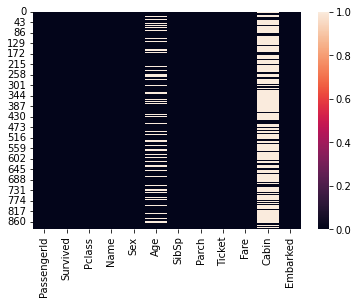

In [9]:
# 시각화로 결측치 확인

sns.heatmap(df.isnull(),cbar=True)

<AxesSubplot:>

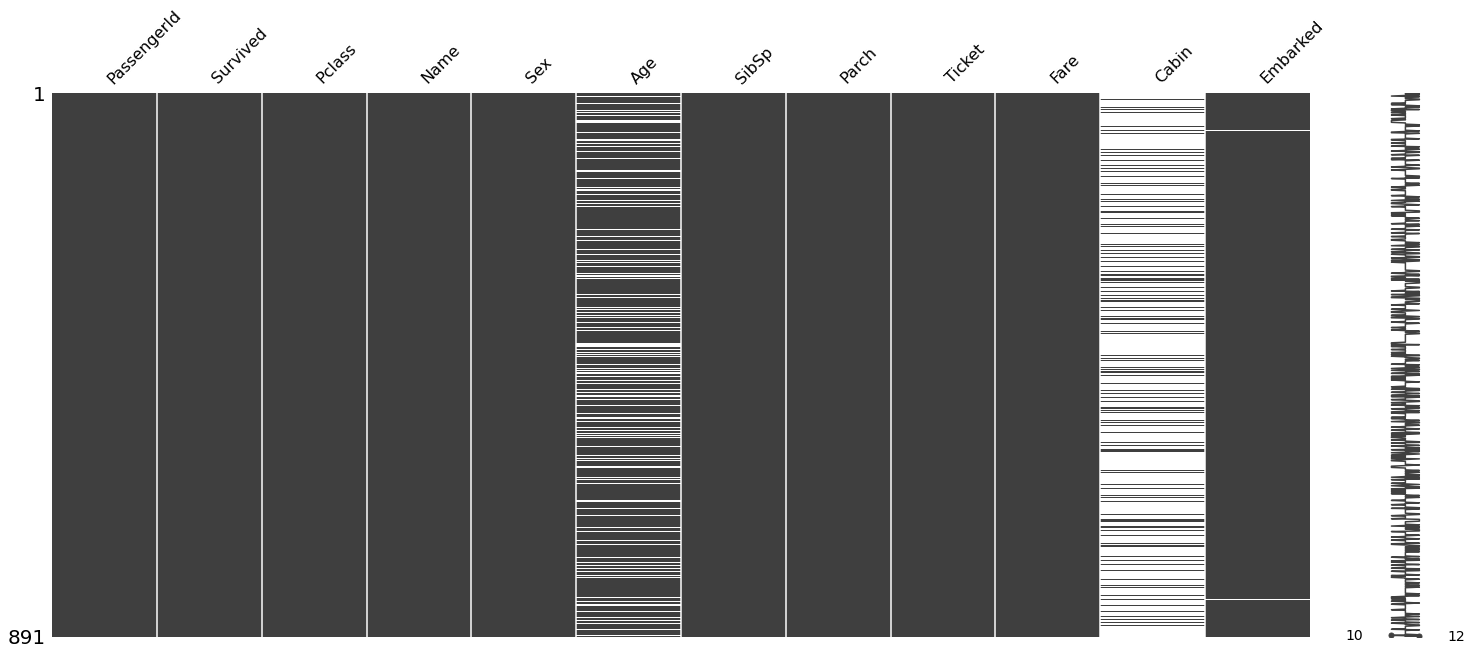

In [10]:
# 시각화로 결측치 확인2

import missingno as msno

msno.matrix(df)

<AxesSubplot:>

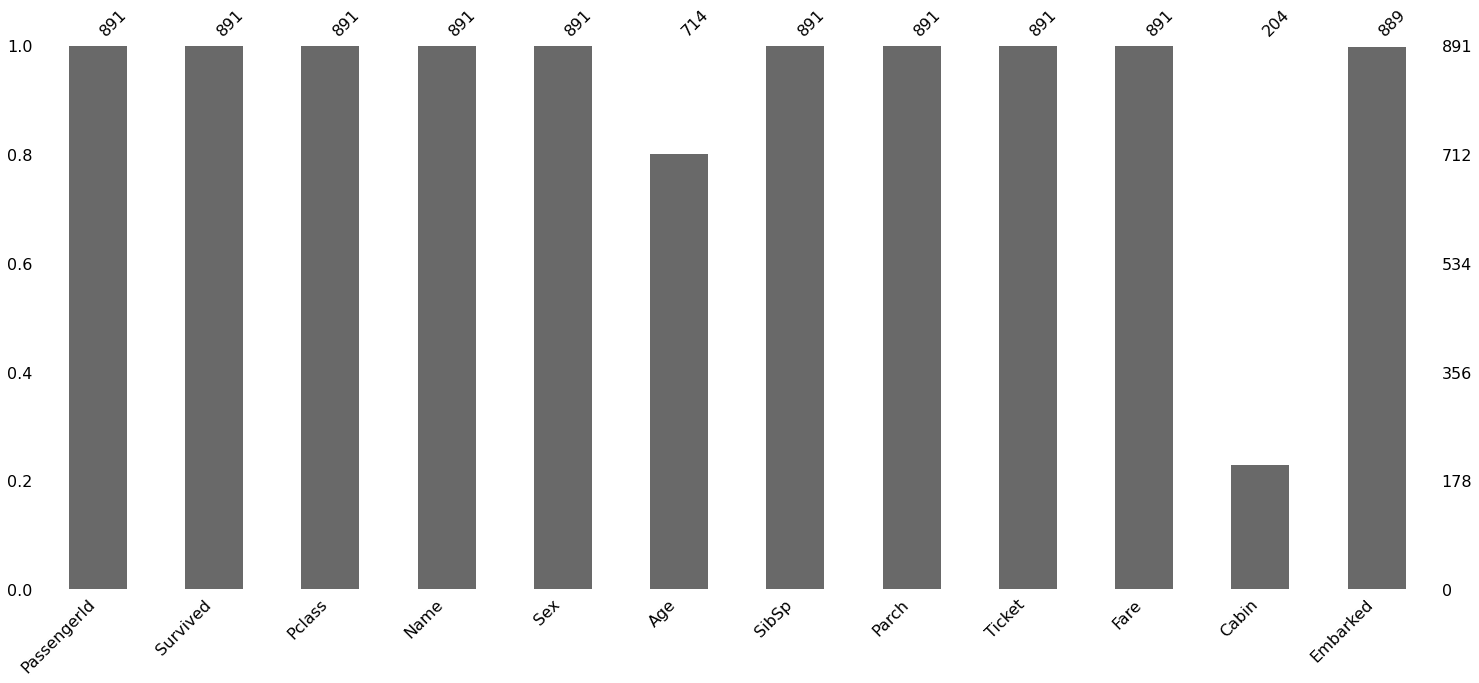

In [11]:
# 시각화로 결측치 확인3

msno.bar(df)

<AxesSubplot:>

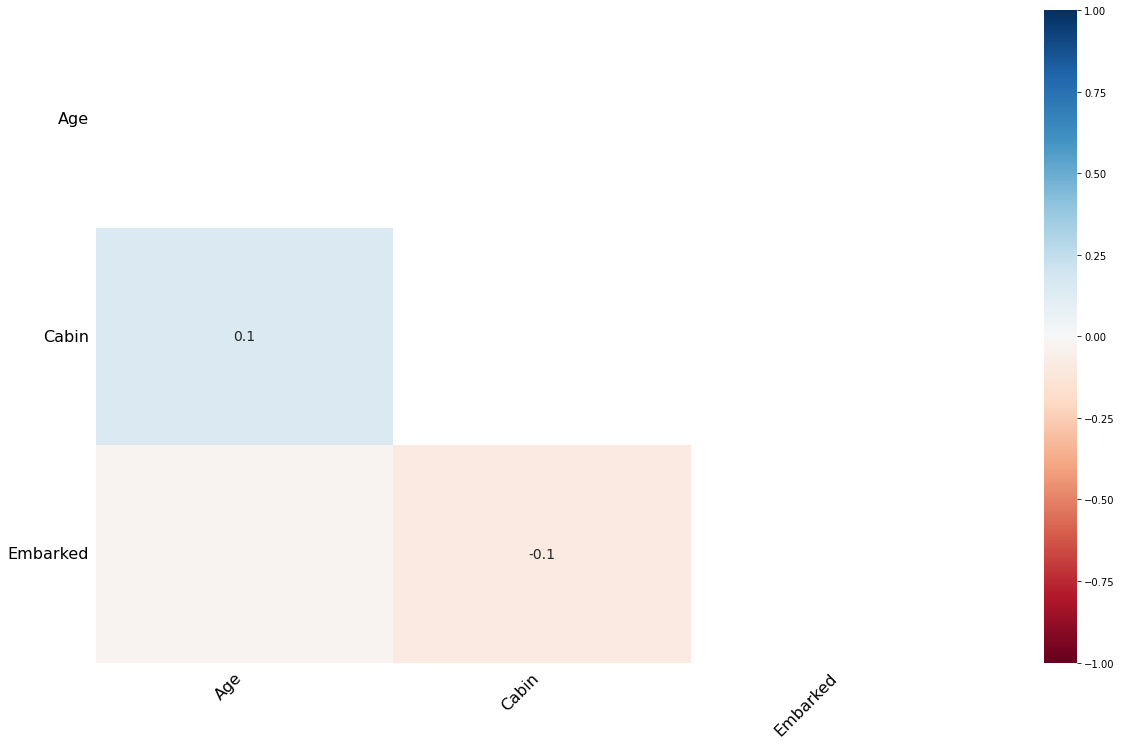

In [12]:
# 시각화로 결측치 확인4

msno.heatmap(df)

<AxesSubplot:>

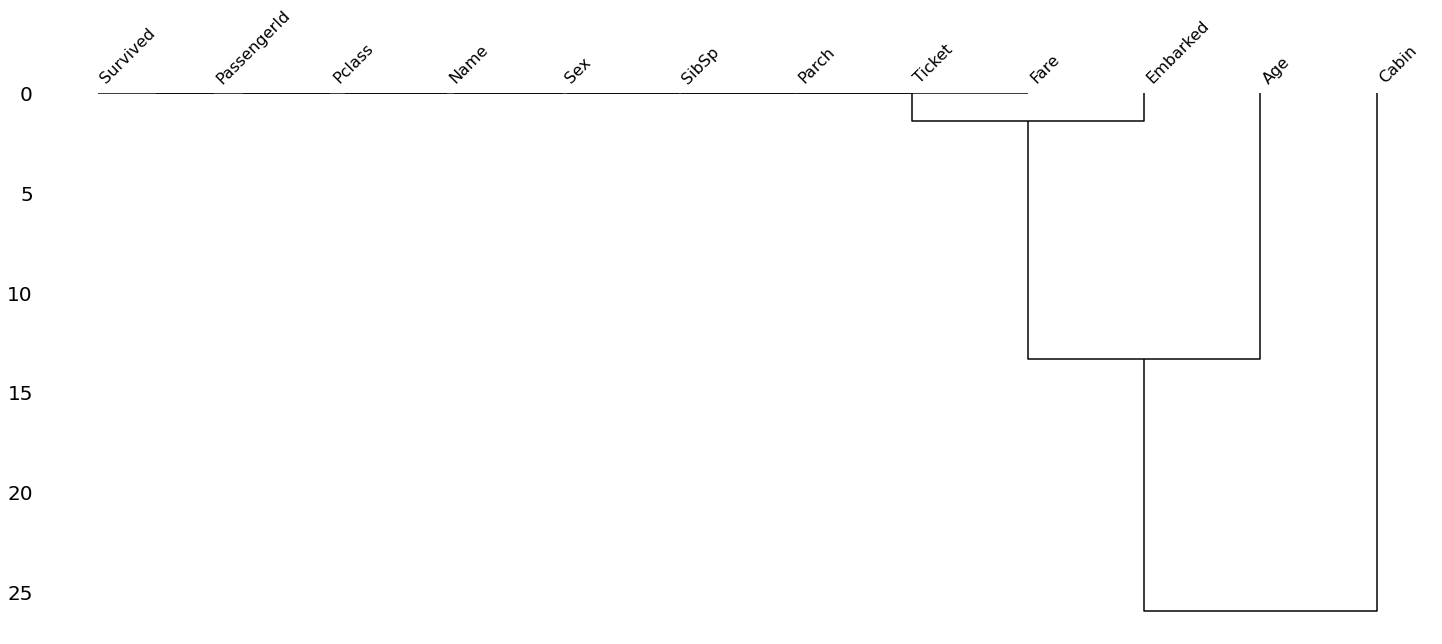

In [13]:
# 시각화로 결측치 확인5

msno.dendrogram(df)

<AxesSubplot:>

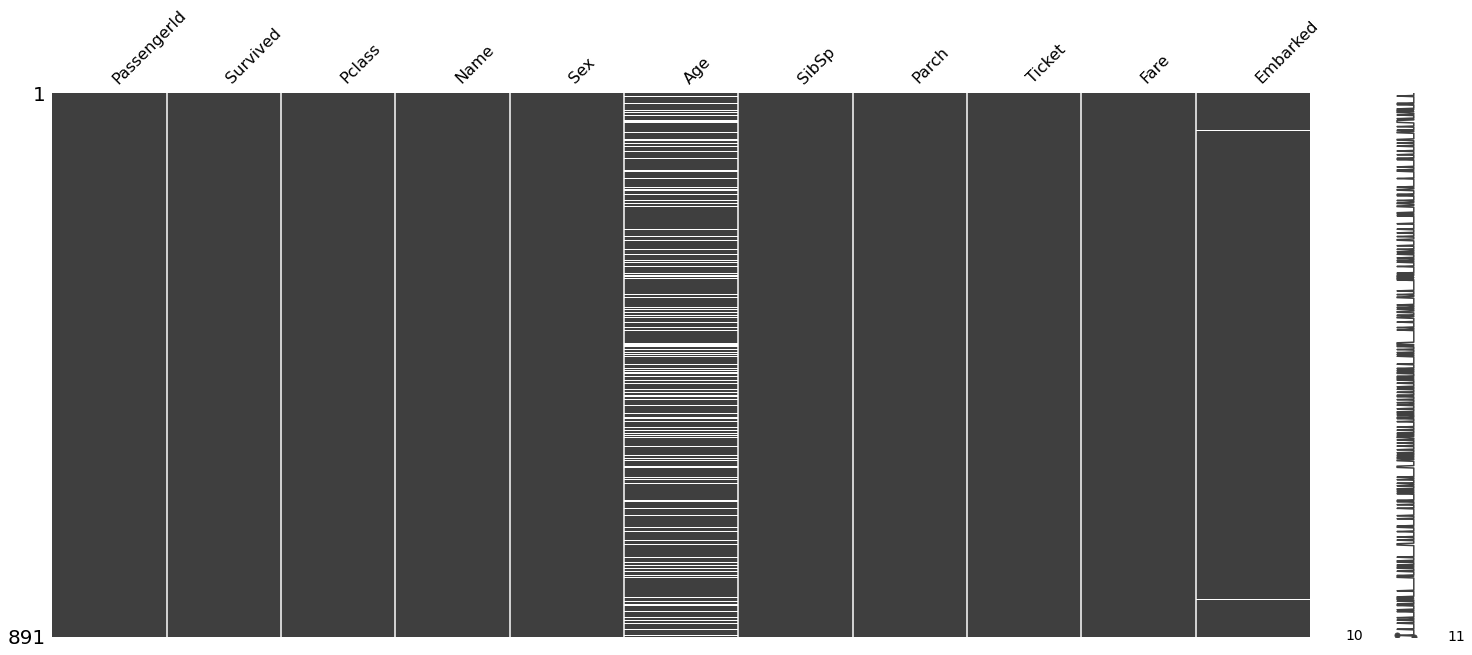

In [14]:
# 결측치 확인 후 정제1

df['Cabin'].value_counts() # Cabin은 결측치가 많기 때문에 삭제

df = df.dropna(thresh=int(len(df)*0.5), axis=1) 

msno.matrix(df)

<AxesSubplot:>

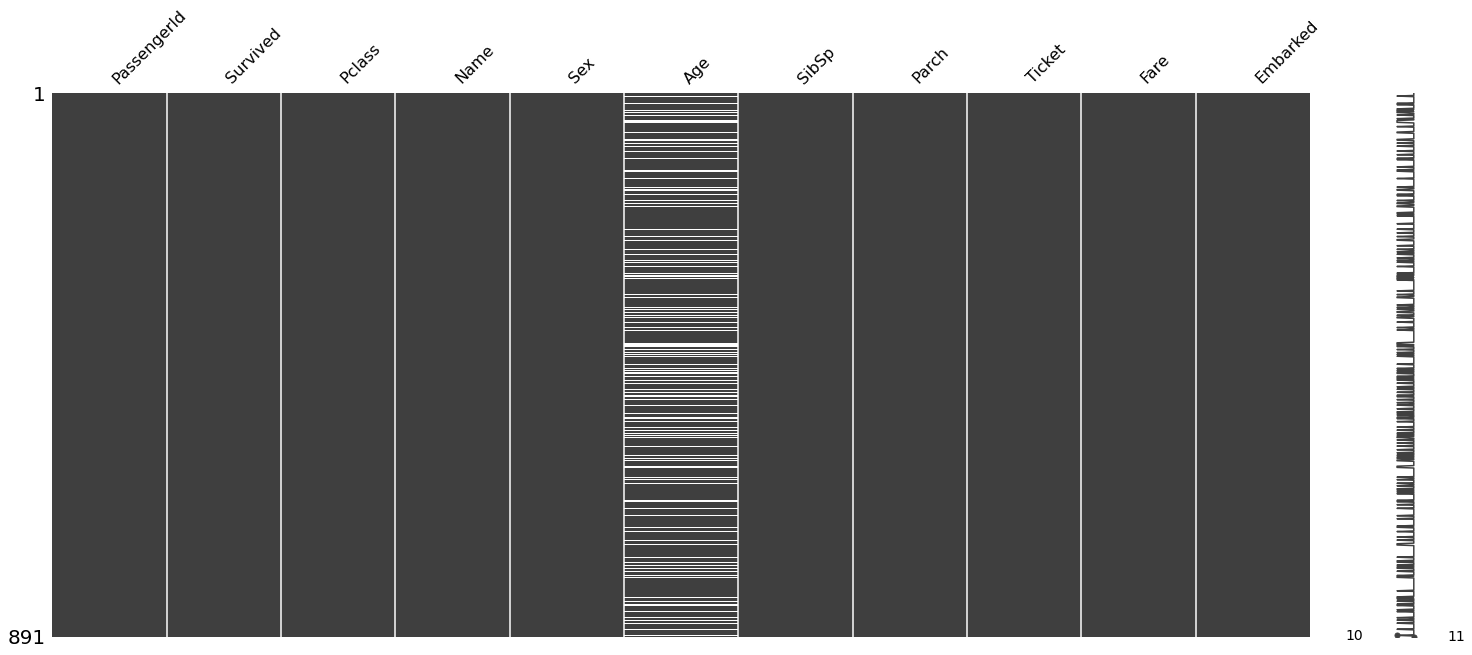

In [15]:
# 결측치 확인 후 정제2

df['Embarked'].value_counts() # 최빈값 S

df['Embarked'] = df['Embarked'].fillna('S')

msno.matrix(df)

<AxesSubplot:>

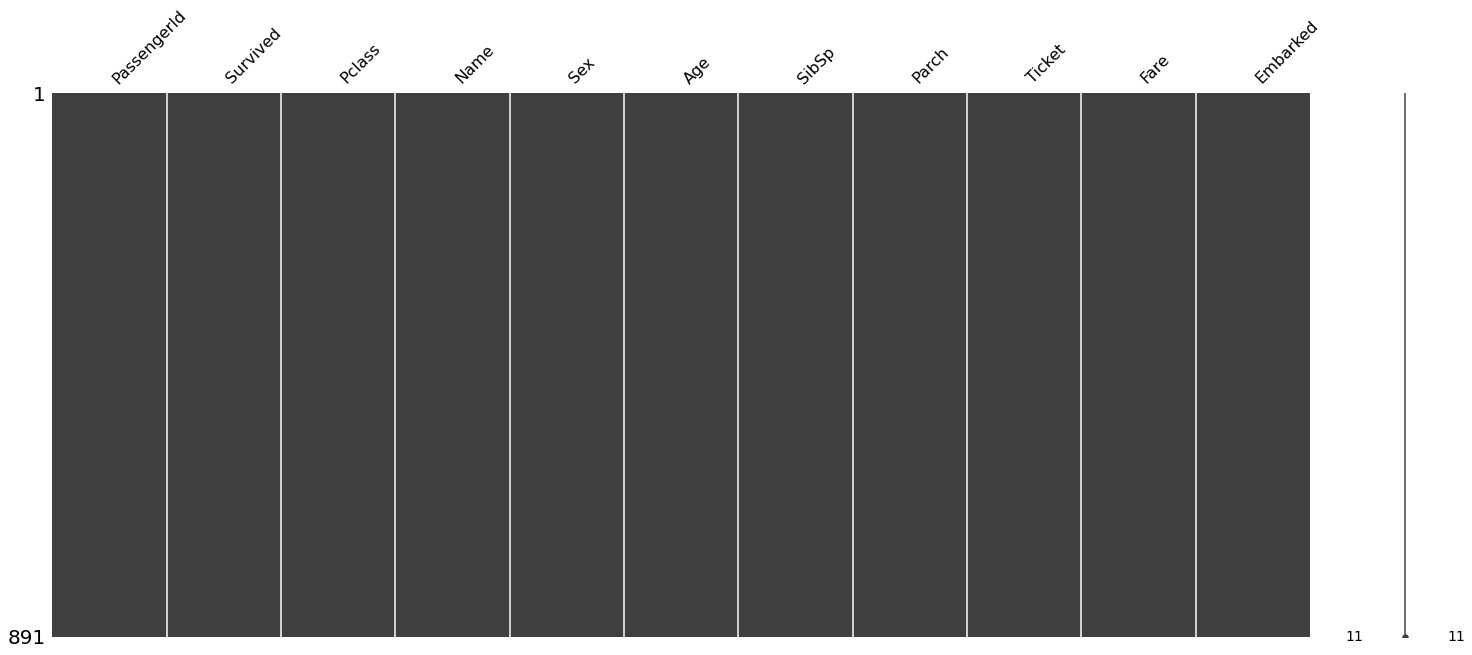

In [16]:
# 결측치 확인 후 정제3

df['Age'].value_counts() # 결측치를 평균으로 대체 

df['Age'] = df['Age'].fillna(df['Age'].mean())

msno.matrix(df)

In [17]:
# 데이터 탐색1 >> 데이터 바이닝 - 연속형 나이 변수 범주화 cut() 함수 사용
# bins = [1,20,60,100] / 1-20 미성년, 21-60 성년, 61-100 노년

bins = [1,20,60,100]

df_Age = pd.cut(df['Age'], bins, labels=['미성년','성년','노년'])

df['Age_class'] = df_Age

df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Embarked Age_class  
0        1      0         A/5 21171   7.2500        S        성년  
1        1      0          PC 17599  71.2833        C        성년  
2        0      0  STON/O2. 3101282   7.9250        S        성년  
3        1      0            113803  53.1000        S        성년  
4        0      0            373450   8.0500        S        성년  
..     ...    ...               ...      ...      ...       ...  
886      0      0            211536  13.0000        S        성년  
887      0      0            112053  30.0000        S       미성년  
888      1      2        W./C. 6607  23.4500        S        성년  
889      0      0            111369  30.0000        C        성년  
890      0      0            370376   7.7500        Q        성년  

[891 rows x 12 columns]

In [18]:
# unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

t1 = df.Age_class.unique()
t1

['성년', '미성년', '노년', NaN]
Categories (3, object): ['미성년' < '성년' < '노년']

In [19]:
# 미성년만 추출

t2 = df[df.Age_class.isin(['미성년'])]
t2

PassengerId  Survived  Pclass                                  Name  \
7              8         0       3        Palsson, Master. Gosta Leonard   
9             10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3       Sandstrom, Miss. Marguerite Rut   
12            13         0       3        Saundercock, Mr. William Henry   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
..           ...       ...     ...                                   ...   
869          870         1       3       Johnson, Master. Harold Theodor   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   
876          877         0       3         Gustafsson, Mr. Alfred Ossian   
877          878         0       3                  Petroff, Mr. Nedelio   
887          888         1       1          Graham, Miss. Margaret Edith   

        Sex   Age  SibSp  Parch     Ticket     Fare Embarked Age_class  
7      male   2.0      3      1     349909  21.0750        S       미성년  
9    female  14.0      1      0     237736  30.0708        C       미성년  
10   female   4.0      1      1    PP 9549  16.7000        S       미성년  
12     male  20.0      0      0  A/5. 2151   8.0500        S       미성년  
14   female  14.0      0      0     350406   7.8542        S       미성년  
..      ...   ...    ...    ...        ...      ...      ...       ...  
869    male   4.0      1      1     347742  11.1333        S       미성년  
875  female  15.0      0      0       2667   7.2250        C       미성년  
876    male  20.0      0      0       7534   9.8458        S       미성년  
877    male  19.0      0      0     349212   7.8958        S       미성년  
887  female  19.0      0      0     112053  30.0000        S       미성년  

[165 rows x 12 columns]

In [20]:
# 미성년만 제거

t3 = df[~df.Age_class.isin(['미성년'])]
t3

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
885               Rice, Mrs. William (Margaret Norton)  female  39.000000   
886                              Montvila, Rev. Juozas    male  27.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Embarked Age_class  
0        1      0         A/5 21171   7.2500        S        성년  
1        1      0          PC 17599  71.2833        C        성년  
2        0      0  STON/O2. 3101282   7.9250        S        성년  
3        1      0            113803  53.1000        S        성년  
4        0      0            373450   8.0500        S        성년  
..     ...    ...               ...      ...      ...       ...  
885      0      5            382652  29.1250        Q        성년  
886      0      0            211536  13.0000        S        성년  
888      1      2        W./C. 6607  23.4500        S        성년  
889      0      0            111369  30.0000        C        성년  
890      0      0            370376   7.7500        Q        성년  

[726 rows x 12 columns]

In [21]:
# 다른 방법으로 바이닝

df_Age2 = pd.qcut(df['Age'], q=3, labels=['미성년','성년','노년'])

df['Age_class2'] = df_Age2

df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Embarked Age_class Age_class2  
0        1      0         A/5 21171   7.2500        S        성년        미성년  
1        1      0          PC 17599  71.2833        C        성년         노년  
2        0      0  STON/O2. 3101282   7.9250        S        성년         성년  
3        1      0            113803  53.1000        S        성년         노년  
4        0      0            373450   8.0500        S        성년         노년  
..     ...    ...               ...      ...      ...       ...        ...  
886      0      0            211536  13.0000        S        성년         성년  
887      0      0            112053  30.0000        S       미성년        미성년  
888      1      2        W./C. 6607  23.4500        S        성년         성년  
889      0      0            111369  30.0000        C        성년         성년  
890      0      0            370376   7.7500        Q        성년         노년  

[891 rows x 13 columns]

In [22]:
# groupby([그룹화데이터]).[출력데이터]

df1 = df.groupby(['Sex','Age_class','Pclass'])['Survived'].mean()

df1

Sex     Age_class  Pclass
female  미성년        1         0.928571
                   2         1.000000
                   3         0.465116
        성년         1         0.974359
                   2         0.900000
                   3         0.489583
        노년         1         1.000000
                   2              NaN
                   3         1.000000
male    미성년        1         0.500000
                   2         0.357143
                   3         0.180556
        성년         1         0.388350
                   2         0.069767
                   3         0.119850
        노년         1         0.083333
                   2         0.333333
                   3         0.000000
Name: Survived, dtype: float64

In [23]:
# stack : 위에서 아래로 (행방향)
# unstack : 왼쪽에서 오른쪽으로 (열방향)

df2 = df1.unstack('Pclass')
df2

Pclass                   1         2         3
Sex    Age_class                              
female 미성년        0.928571  1.000000  0.465116
       성년         0.974359  0.900000  0.489583
       노년         1.000000       NaN  1.000000
male   미성년        0.500000  0.357143  0.180556
       성년         0.388350  0.069767  0.119850
       노년         0.083333  0.333333  0.000000

In [24]:
# 피봇 테이블

df.pivot_table(['Survived'], index=['Sex','Pclass'], aggfunc='mean')

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [25]:
# 탐색 자동보고서 / 질문

import pandas_profiling
import pandas as pd

df = pd.read_csv('./csv/titanic_train.csv')
profile = df.profile_report()
profile.to_file("test.html")
profile

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 311.22it/s]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


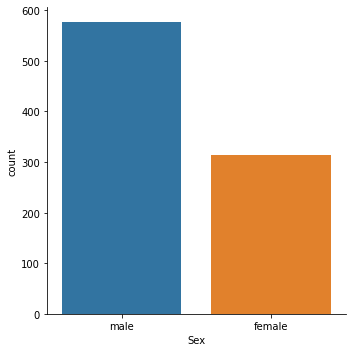

In [26]:
# 단변량 시각화1

sns.catplot('Sex', kind='count', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


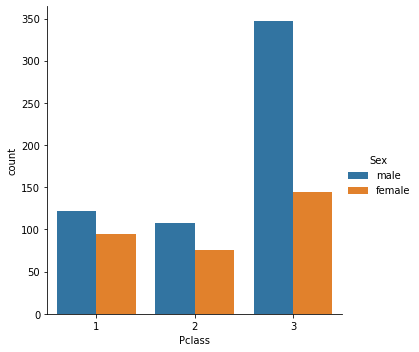

In [27]:
# 단변량 시각화2

sns.catplot('Pclass', kind='count', hue='Sex', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


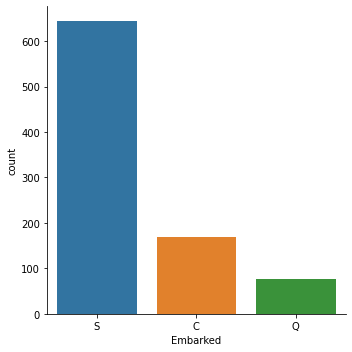

In [28]:
# 단변량 시각화3

sns.catplot('Embarked', kind='count', data=df)

<AxesSubplot:>

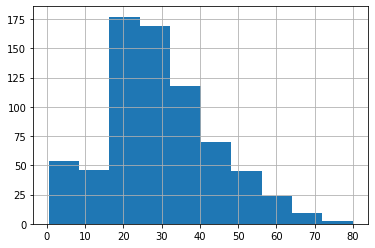

In [29]:
# 단변량 시각화4 (연속형 범주는 히스토그램)

df['Age'].hist()

<AxesSubplot:>

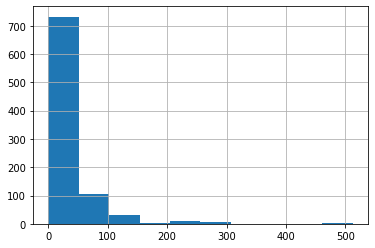

In [30]:
# 단변량 시각화5 (연속형 범주는 히스토그램)

df['Fare'].hist()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


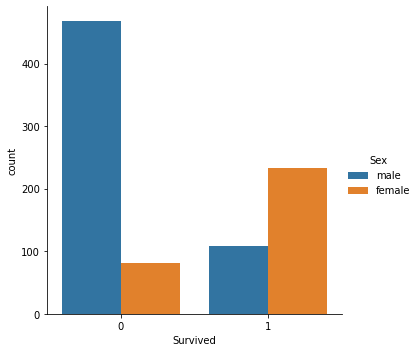

In [31]:
# 범주형x범주형 시각화1

sns.catplot('Survived', kind='count', hue='Sex', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


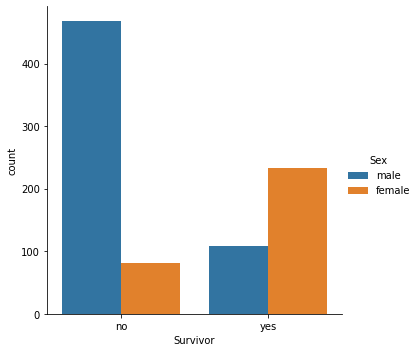

In [32]:
# 범주형x범주형 시각화2

df['Survivor'] = df['Survived'].map({0:'no',1:'yes'})
sns.catplot('Survivor', kind='count', hue='Sex', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


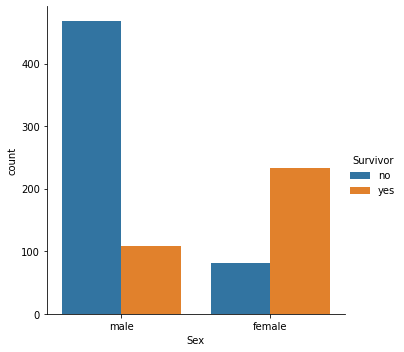

In [33]:
# 범주형x범주형 시각화3

sns.catplot('Sex', kind='count', hue='Survivor', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


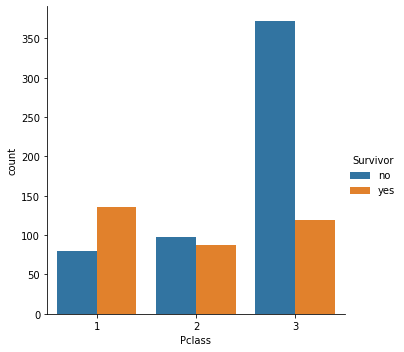

In [34]:
# 범주형x범주형 시각화3

sns.catplot('Pclass', kind='count', hue='Survivor', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


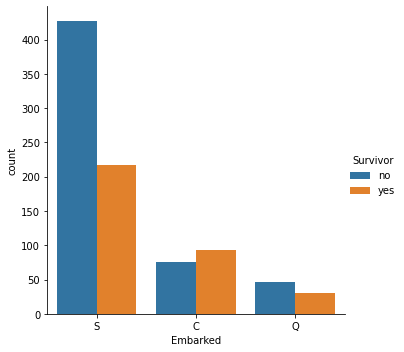

In [35]:
# 범주형x범주형 시각화4

sns.catplot('Embarked', kind='count', hue='Survivor', data=df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


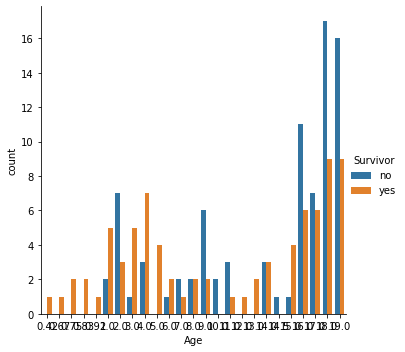

In [36]:
# 범주형x범주형 시각화5

sns.catplot('Age', kind='count', hue='Survivor', data=df.loc[df['Age']<20])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


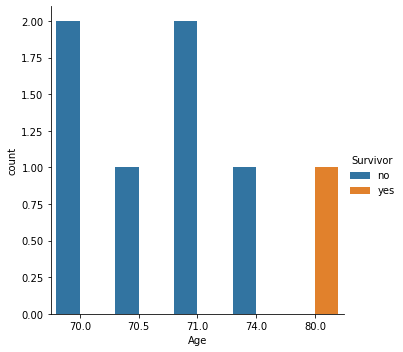

In [37]:
# 범주형x범주형 시각화6

sns.catplot('Age', kind='count', hue='Survivor', data=df.loc[df['Age']>=70])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


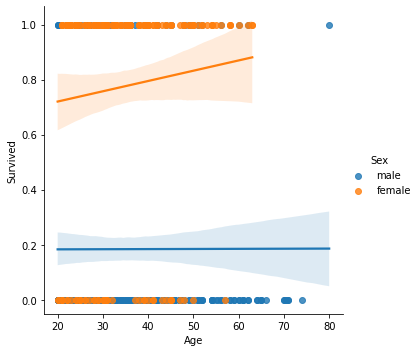

In [38]:
# 범주형x범주형 시각화7

sns.lmplot('Age', 'Survived', hue='Sex', data=df.loc[df['Age']>=20])

In [39]:
# 폰트 적용

plt.rcParams['font.family'] = 'AppleGothic'

KeyError: "['Age_class'] not in index"

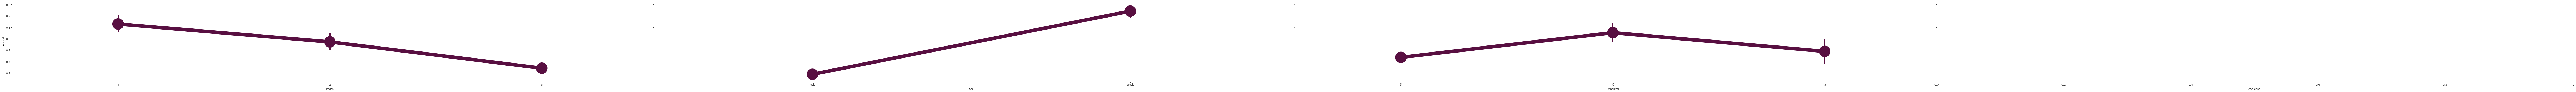

In [44]:
# 범주형x범주형 시각화8 #질문2

from matplotlib import rcParams

Pg = sns.PairGrid(df, y_vars='Survived', x_vars=['Pclass','Sex','Embarked','Age_class'], height=5, aspect=7)
Pg.map(sns.pointplot, scale=5, errwidth=4, color='xkcd:plum')
Pg.set(ylim=(0,1))

sns.despine(fig=Pg.fig, left=True)

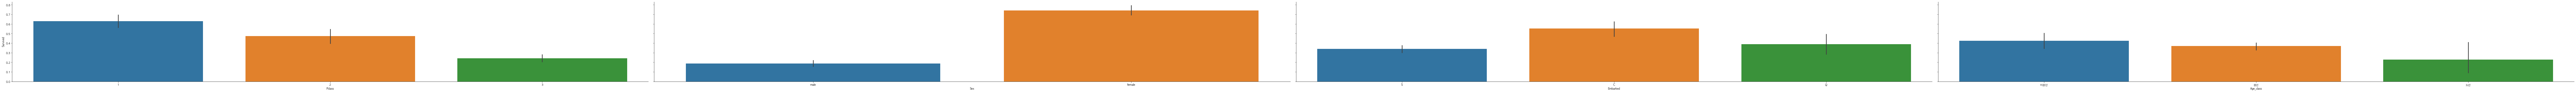

In [ ]:
# 범주형x범주형 시각화9 barplot

Pg = sns.PairGrid(df, y_vars='Survived',
                x_vars=['Pclass', 'Sex', 'Embarked', 'Age_class'],
                height=5, aspect=7)
                
Pg.map(sns.barplot)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


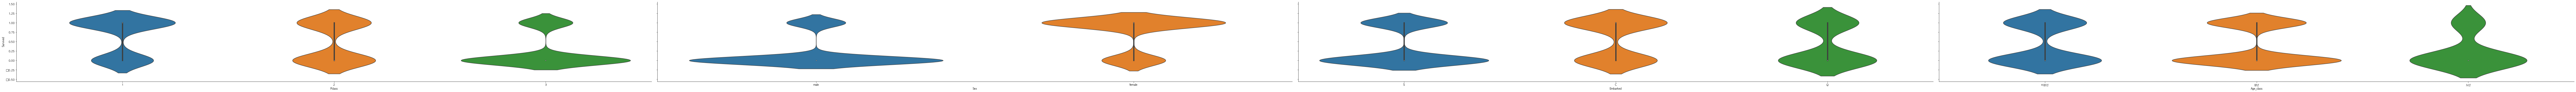

In [ ]:
# 범주형x범주형 시각화10 violinplot

Pg = sns.PairGrid(df, y_vars='Survived',
                x_vars=['Pclass', 'Sex', 'Embarked', 'Age_class'],
                height=5, aspect=7)
                
Pg.map(sns.violinplot)

### 회귀분석

- 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
- 일반 선형 회귀, 릿지, 라쏘, 엘라스틱넷, 로지스틱 회귀
#
- RSS : 오류 값의 제곱을 구해서 더하는 방식 / RSS = 비용함수 = 손실함수
- 회귀분석의 적은 비용함수를 최소화 하는 것(feat. 경사하강법)
#
- MSE : 잔차의 제곱합
- RMSE : 잔차 제곱합의 제곱근
#
- 경사하강법 수행 프로세스
1. w0,w1 임의의 값 설정 후 비용함수 값 계산
2. learning rate를 반복하며 비용함수 값 계산
3. 비용함수 값이 감소하면 2번째 반복. 감소하지 않으면 반복 중지

100
100


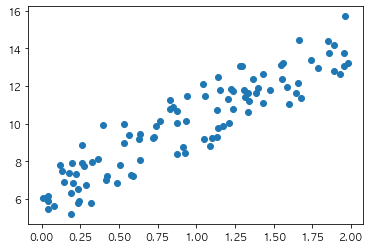

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)

# X.shape, y.shape
print(len(X))
print(len(y))

In [ ]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update


In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X,y,iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

    

In [ ]:
# RSS(MSE) >> np.square

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N # 오차값
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))


w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


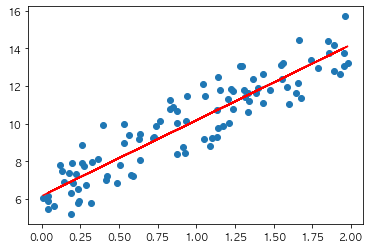

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred, color='r')

In [ ]:
# 미니 배치 확률적 경사하강법

# 샘플링으로 데이터를 추출하여 시간 단축

def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=100):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [ ]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


### sklearn.linear_model.LinearRegression

- class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
#
- 다중공선성 : 피처간의 상관관계가 높은 경우 분산이 매우 커져서 오류에 민감해지는 문제 / 피처 제거나 규제로 완화시킴

[79.6131561]


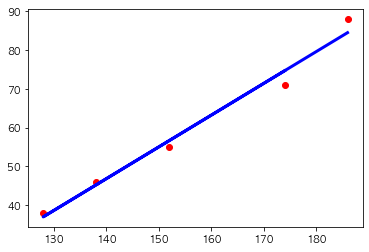

In [ ]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174],[152],[138],[128],[186]]
y = [71,55,46,38,88]
reg.fit(X,y)

print(reg.predict([[180]]))

# 학습 데이터와 y값을 산포도로 그린다
plt.scatter(X,y, c ='r')

# 학습 데이터를 입력으로 하여 예측값을 계산
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프를 그린다
# 계산된 기울기와 y절편을 가지는 직선이 그려진다
plt.plot(X, y_pred, c = 'b', linewidth = 3)
plt.show()

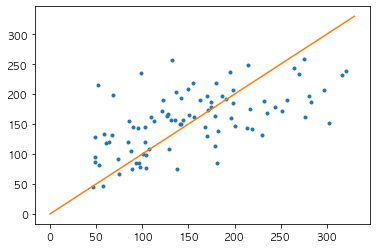

In [ ]:
# 당뇨병 예제

import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

# 당뇨병 데이터 세트 적재
diabetes = load_diabetes()

# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# 선형 회귀 모델로 학습 수행
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 실제 데이터와 예측 데이터 비교
plt.plot(y_test, y_pred,'.')

# 직선을 그리기 위하여 완벽한 선형 데이터를 생성
x = np.linspace(0, 330, 100)
y = x
plt.plot(x,y)
plt.show()

In [ ]:
# 보스턴 주택가격 예측1

# train : test = 70 : 30
# 1. 0:13 => feature
# 2. 13 => label
# 3. LinearRegression을 활용하여 mean.square()구하세요

# 4. Feature Scaling을 한 후
# 5. LinearRegression을 활용하여 mean.square()구하세요

# 6. random_forest 또는 XGBoost를 활용하여 적정한 feature_selection
# 7. LinearRegression을 활용하여 mean.square()구하세요

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline

# boston 데이터셋 로드
boston = pd.read_csv('./csv/housing.csv', sep='\s+', header=None, names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

# 데이터 백업하기
boston_copy_backup = boston.copy()
df.to_csv('./csv/housing_backup.csv')

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston)

# 학습 데이터와 테스트 데이터 분리
X = bostonDF.drop('MEDV', axis=1)
y = bostonDF['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)

# 선형 회귀 모델로 학습 수행
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_preds = model.predict(X_test)

# MSE & RMSE & R2
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE :{0:.3f}, RMSE :{1:.3f}'.format(mse, rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test, y_preds)))


MSE :33.733, RMSE :5.808
Variance score:0.540


In [ ]:
# 4. Feature Scaling을 한 후
# 5. LinearRegression을 활용하여 mean.square()구하세요

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# 객체 생성
scaler = StandardScaler()

# fit >> transform
scaler.fit(boston) 
boston_scaled = scaler.transform(boston)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환
boston_scaled = pd.DataFrame(data= boston_scaled)

# 학습 데이터와 테스트 데이터 분리
X = boston_scaled.drop(13, axis=1)
y = boston_scaled[13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)

# 선형회귀 훈련 및 변형
lr = LinearRegression()

lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

# MSE & RMSE & R2
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE :{0:.3f}, RMSE :{1:.3f}'.format(mse, rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test, y_preds)))

# ## 파이프 라인 이용 ### 질문

# # boston 데이터셋 DataFrame 변환
# bostonDF = pd.DataFrame(boston)

# # 학습 데이터와 테스트 데이터 분리
# X = bostonDF.drop('MEDV', axis=1)
# y = bostonDF['MEDV']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)

# pipeline = Pipeline([
#     ('scaler',StandardScaler()),
#     ('lr', LinearRegression())
# 	])

# pipeline.fit(X_train,y_train)

# y_preds = pipeline.predict(X_test)

# # MSE & RMSE & R2
# mse = mean_squared_error(y_test, y_preds)
# rmse = np.sqrt(mse)

# print('MSE :{0:.3f}, RMSE :{1:.3f}'.format(mse, rmse))
# print('Variance score:{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE :0.400, RMSE :0.632
Variance score:0.540


[12:58:56] WARNING: /private/var/folders/8b/f3d6s4_571bds9t_ch39vmn00000gn/T/pip-install-ko_rd4py/xgboost_df6f9aaaf36d49a68c312191d1ac1546/build/temp.macosx-10.9-universal2-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


MSE :41.422, RMSE :6.436
Variance score:0.435


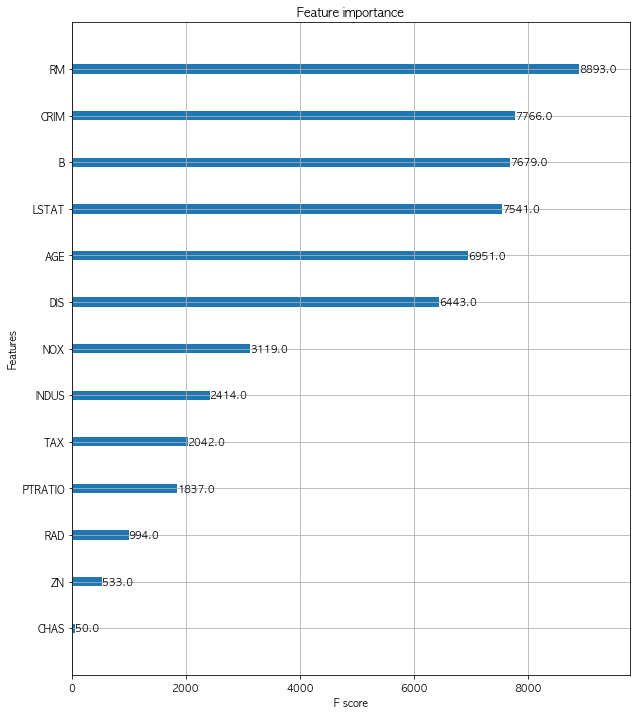

In [ ]:
# 6. random_forest 또는 XGBoost를 활용하여 적정한 feature_selection
# 7. LinearRegression을 활용하여 mean.square()구하세요

import xgboost as xgb # pip install -U pip
from xgboost import plot_importance, XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston)

# 학습 데이터와 테스트 데이터 분리
X = bostonDF.drop('MEDV', axis=1)
y = bostonDF['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)

# xgb 훈련

xgb_clt = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgb_clt.fit(X_train, y_train)
pred = xgb_clt.predict(X_test)
pred_proba = xgb_clt.predict_proba(X_test)

# 그래프로 변수 선택

fig, ax = plt.subplots(figsize=(10,12))

plot_importance(xgb_clt, ax=ax) # 변수 RM, CRIM, B, LSTAT 선택

# 학습 데이터와 테스트 데이터 재선정
X1 = bostonDF[['RM', 'CRIM', 'B', 'LSTAT']] # 여러 개의 컬럼 데이터를 추출하는 경우 대괄호 2개
y1 = bostonDF['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=107)

# 선형회귀 훈련 및 변형
lr = LinearRegression()

lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

# MSE & RMSE & R2
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE :{0:.3f}, RMSE :{1:.3f}'.format(mse, rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
# 보스턴 주택가격 예측2

# 데이터 로드 및 확인

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)

# boston dataset의 target array는 주택 가격. PRICE 컬럼으로 DataFrame에 존재 / 언제나 데이터를 확인하는 습관 (X(data, feature_names), y(target = label))
bostonDF['PRICE'] = boston.target

print(bostonDF.shape)
bostonDF.head()




(506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

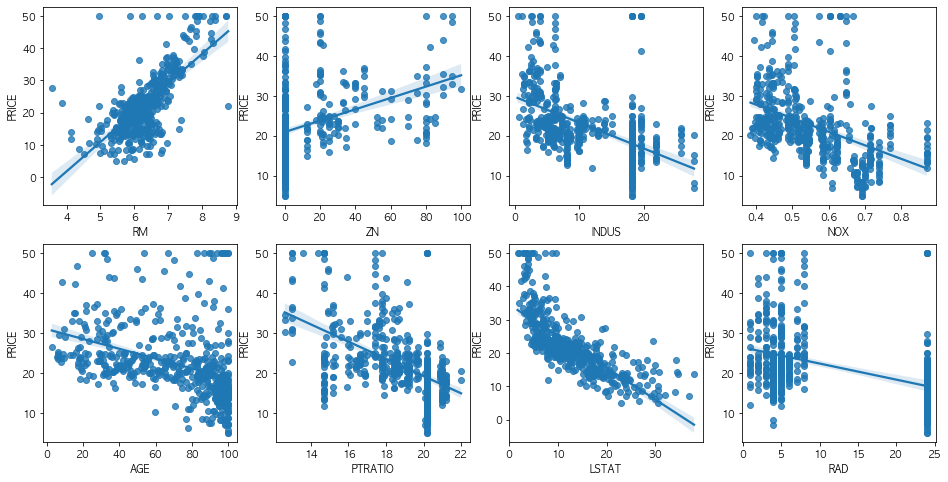

In [ ]:
# 보스턴 주택가격 예측2

# 피처/타겟값 상관관계 파악 - seaborn의 regplot을 이용하면 산점도와 선형 회귀 직선을 함께 나타내준다

# 2개의 행과 4개의 열을 가진 subplots을 이용. axs는 4x2개의 ax를 가짐

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS', 'NOX', 'AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [ ]:
# 학습/테스트 데이터 분리하고 Linear Regression 학습/예측/평가 수행

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

print('절편 값 :',lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편 값 : 40.995595172164414
회귀 계수값 : [ -0.   0.   0.   3. -20.   3.   0.  -2.   0.  -0.  -1.   0.  -1.]


In [ ]:
# 회귀 계수(모델에 영향을 미치는 정도)가 큰 순서대로 정렬

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의

coeff = pd.Series(data = np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

# NOX 회귀 계수 값이 매우 큼, NOX 값에 따라서 예측 오류 값이 많이 영향을 받을 것으로 에상

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
# Fold 셋으로 교차 검증을 수행하여 MSE, RMSE 구하기

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error'로 반환된 값은 모두 음수)
print(' 5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores :', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE : 5.829


In [ ]:
# 다항 선형 회귀

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]


In [ ]:
# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [[ 1  5]
 [17 43]]


In [ ]:
from sklearn.linear_model import LinearRegression

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 shape: (2, 10)


In [ ]:
# 파이프 라인을 이용한 다항 회귀

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomail 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomail 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [ ]:
# 다항 회귀로 보스턴 주택 가격 예측

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target

print(bostonDF.shape)
bostonDF.head()



(506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [ ]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [ ]:
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),('linear', LinearRegression())])
p_model

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [ ]:
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# 일반 회귀와 비슷한 RMSE 값이 나온다

MSE : 15.556, RMSE : 3.944
Variance score : 0.782


In [ ]:
# 다항회귀에서 차수를 높이면 오버피팅될 우려가 있다

p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),('linear', LinearRegression())])
p_model

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])

In [ ]:
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# 오버피팅 된다

MSE : 79625.593, RMSE : 282.180
Variance score : -1116.598


In [ ]:
# degree=2 로 변환된 다항 회귀의 피처들을 살펴보면, 기존의 피처 13개를 조합해서 피처가 104개로 늘어난 것을 확인할 수 있다
# 다항식에서 degree가 높아지면 오버피팅이 일어날 수 있다

X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
print(X_train_poly.shape, X_train.shape)

(354, 104) (354, 13)


In [ ]:
# 다항 회귀의 차수를 변화시키면서 회귀 계수와 MSE값을 구해보고 추세선 그리기

# noise값이 추가된 코사인 시뮬레이션 점 찍기

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X 값에 대해 Cosine 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun()에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1
y


array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

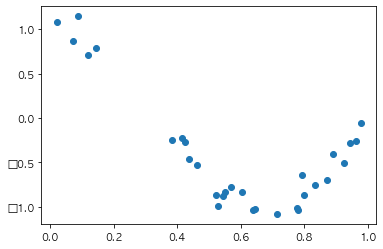

In [ ]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.]입니다.
Degree 1 MSE는 0.41입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.]입니다.
Degree 4 MSE는 0.04입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87416400e+06  2.03716560e+07
 -1.44873571e+08  7.09316967e+08 -2.47066414e+09  6.24562770e+09
 -1.15676855e+10  1.56895436e+10 -1.54006546e+10  1.06457645e+10
 -4.91379382e+09  1.35920182e+09 -1.70381489e+08]입니다.
Degree 15 MSE는 182663732.56입니다.


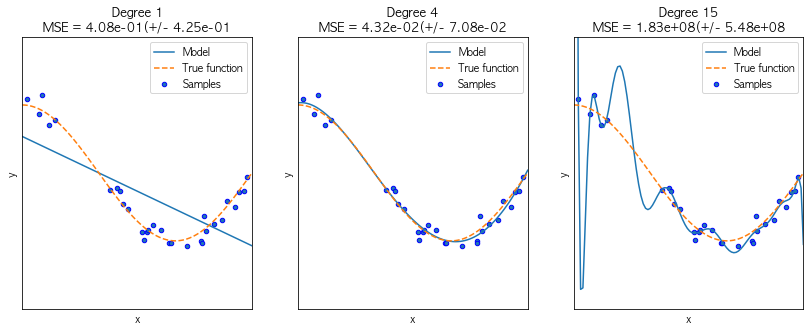

In [ ]:
# 다항 회귀의 차수를 변화시키면서 회귀 계수와 MSE값을 구하고 그래프로 나타내기
plt.figure(figsize=(14,5))
degrees =[1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_

    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE는 {1:.2f}입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')

    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor = 'b', s=20, label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim(0,1); plt.ylim(-2,2); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

    

In [ ]:
# 릿지 회귀

# 앞의 LinearRegression 예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터 셋을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)

# boston dataset의 target array는 주택 가격. PRICE 컬럼으로 DataFrame에 존재 / 언제나 데이터를 확인하는 습관 (X(data, feature_names), y(target = label))
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# 릿지 클래스
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores), 3)
print(' 5 folds의 개별 RMSE scores: ', np.round(rmse_scores), 3)
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

# 규제를 적용하지 않은 선형 회귀는 RMSE가 5.829였으므로 모델 성능이 향상된 것을 확인할 수 있다

 5 folds의 개별 Negative MSE scores:  [-11. -24. -28. -75. -29.] 3
 5 folds의 개별 RMSE scores:  [3. 5. 5. 9. 5.] 3
 5 folds의 평균 RMSE: 5.518


In [ ]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0,0.1,1,10,100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

    # 알파값이 증가할수록 모델 성능이 향상

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


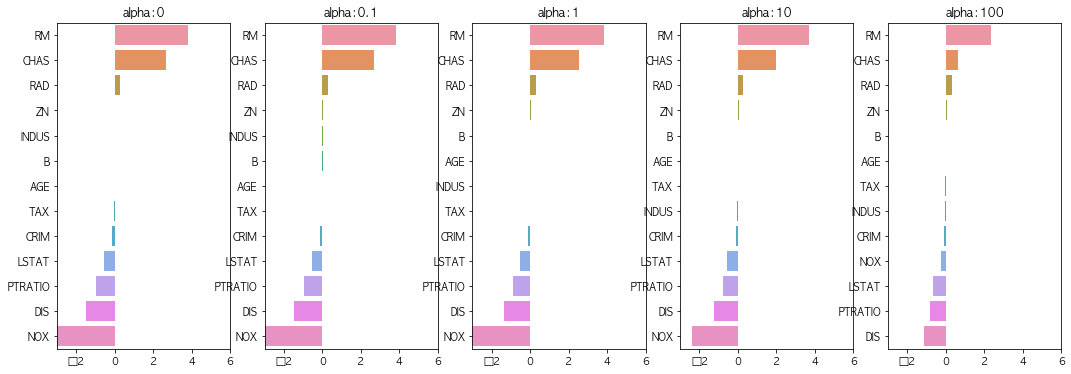

In [ ]:
# 알파값이 증가할수록 실제로 회귀 계수 값이 작아지는지 확인하기

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서 회귀 계수를 시각화 
    coeff = coeff.sort_values(ascending=False) # 회귀 계수값이 높은 순으로 표현
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [ ]:
# 알파값에 따른 회귀 계수 출력
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])

coeff_df.sort_values(by=sort_column, ascending=False)


alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
RM        3.809865   3.818233   3.854000  3.702272   2.334536
CHAS      2.686734   2.670019   2.552393  1.952021   0.638335
RAD       0.306049   0.303515   0.290142  0.279596   0.315358
ZN        0.046420   0.046572   0.047443  0.049579   0.054496
INDUS     0.020559   0.015999  -0.008805 -0.042962  -0.052826
B         0.009312   0.009368   0.009673  0.010037   0.009393
AGE       0.000692  -0.000269  -0.005415 -0.010707   0.001212
TAX      -0.012335  -0.012421  -0.012912 -0.013993  -0.015856
CRIM     -0.108011  -0.107474  -0.104595 -0.101435  -0.102202
LSTAT    -0.524758  -0.525966  -0.533343 -0.559366  -0.660764
PTRATIO  -0.952747  -0.940759  -0.876074 -0.797945  -0.829218
DIS      -1.475567  -1.459626  -1.372654 -1.248808  -1.153390
NOX     -17.766611 -16.684645 -10.777015 -2.371619  -0.262847

In [ ]:
# 평균 RMSE, 회귀 계수 값들을 반환해주는 함수 이용

from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환해주는 함수

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

# end of get_linear_regre_eval

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.189


In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.789725   3.703202   2.498212  0.949811  0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
B          0.010248   0.010249   0.009469  0.008247  0.006510
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
LSTAT     -0.560431  -0.568769  -0.656290 -0.761115 -0.807679
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000

In [ ]:
# 엘라스티넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

# 알파값이 0.5일 때 RMSE가 가장 좋다

####### ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.574162   3.414154   1.918419  0.938789  0.000000
CHAS       1.330724   0.979706   0.000000  0.000000  0.000000
RAD        0.278880   0.283443   0.300761  0.289299  0.146846
ZN         0.050107   0.050617   0.052878  0.052136  0.038268
B          0.010122   0.010067   0.009114  0.008320  0.007020
AGE       -0.010116  -0.008276   0.007760  0.020348  0.043446
TAX       -0.014522  -0.014814  -0.016046 -0.016218 -0.011417
INDUS     -0.044855  -0.042719  -0.023252 -0.000000 -0.000000
CRIM      -0.099468  -0.099213  -0.089070 -0.073577 -0.019058
NOX       -0.175072  -0.000000  -0.000000 -0.000000 -0.000000
LSTAT     -0.574822  -0.587702  -0.693861 -0.760457 -0.800368
PTRATIO   -0.779498  -0.784725  -0.790969 -0.738672 -0.423065
DIS       -1.189438  -1.173647  -0.975902 -0.725174 -0.031208